# Name : Adhyatm Mishra
# Roll No : 02

In [ ]:

import numpy as np
import pandas as pd


from numpy.linalg import inv      # linalg = linear algebra, inv = inverse (used to find inverse of a matrix)

import os
from numpy import random
import scipy
from scipy import stats
from scipy.stats import skew, kurtosis
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import t
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import chisquare
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import f

import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
from statsmodels.stats.weightstats import ztest


import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import  proportions_ztest

from statsmodels.stats import rates
from statsmodels.stats.rates import test_poisson
from statsmodels.stats.rates import test_poisson_2indep

# Machine Learning
from sklearn.model_selection import train_test_split



# os.chdir(r"C:\\Users\\Adhyatm\\Downloads\\R-programming")

In [2]:
os.chdir(r"C:\\Users\\Adhyatm\\Downloads")

In [3]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# **1.  Data Cleaning and Preprocessing**




In [5]:
df = df.drop(["agent", "company"], axis = 1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


dropped the unwanted columns company and agent

In [6]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print(cat_cols)
print(num_cols)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


there are null values in 'children' and 'country' columns

In [7]:
df['children'] = df['children'].fillna(0)
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

removed null values from 'children' column by filling the null values with mode of 'children' column

In [8]:
df['children'].mode()

0    0.0
Name: children, dtype: float64

In [9]:
df['country'].mode()

0    PRT
Name: country, dtype: object

In [10]:
df['country'] = df['country'].fillna("PRT")


In [11]:
df['country'].isnull().sum()

0

removed null values from 'country' column by filling the null values with mode of 'country' column

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

No need to remove any duplicated rows as we do not have any very specific unique columns such as booking_id or identity_card etc

Convert Categorical Variables :

In [13]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

 Parse and standardize date columns : 

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
df['arrival_date_month'] = df['arrival_date_month'].map({"January": 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})


Replaced arrival_date_month column's values with numeric values of month

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [17]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + "/" + df['arrival_date_month'].astype(str).str.zfill(2) + "/" + df['arrival_date_day_of_month'].astype(str).str.zfill(2), format='%Y/%m/%d' )


In [18]:
df['arrival_date'] = pd.to_datetime(df['arrival_date']).dt.strftime('%Y/%m/%d')


In [19]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date']).dt.strftime('%Y/%m/%d')


converted the date to the standard format

In [20]:
cols = list(df.columns)
cols.remove('arrival_date')
target_index = cols.index('reservation_status_date')
cols.insert(target_index, 'arrival_date')
df = df[cols]


In [21]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_date,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015/07/01,2015/07/01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015/07/01,2015/07/01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015/07/01,2015/07/02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015/07/01,2015/07/02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015/07/01,2015/07/03


rearranged the 'reservation_status_date' and 'arrival_date' columns

Create derived fields : 

In [22]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']


In [23]:
df['total_revenue'] = df['adr'] * df['total_nights']

Derived 3 columns 'total_guests', 'total_nights', 'total_revenue'

In [24]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_guests',
 'total_nights',
 'total_revenue']

In [ ]:
# def bounds(col):
#   q1 = np.percentile(col,25)
#   q3 = np.percentile(col,75)
#   iqr = q3 - q1
#   ub = q3 + 1.5*iqr
#   lb = q1 - 1.5*iqr
#   t1 = np.where(col>=ub)
#   t2 = np.where(col<=lb)
#   val1 = (np.where((col>=q3) | (col<=ub)))[0]
#   val2 = (np.where((col<=q1) | (col>=lb)))[0]
#   uw = col[val1]
#   lw = col[val2]
#   col[t1] = uw[0]
#   col[t2] = lw[0]
#   return col

# numeric_cols = ['lead_time', 'adr', 'total_nights', 'total_of_special_requests', 'total_guests']

# for col in numeric_cols:
#       df[col] = bounds(df[col])

In [25]:
numeric_cols = ['lead_time', 'adr', 'total_nights', 'total_of_special_requests', 'total_guests']


I am keeping outliers as it is. There are business questions which may depend upon these data. I can remove these or replace these with q3 < max <= ub, lb < min <= q1. Hence, preserving outliers so as to answer business questions

In [26]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


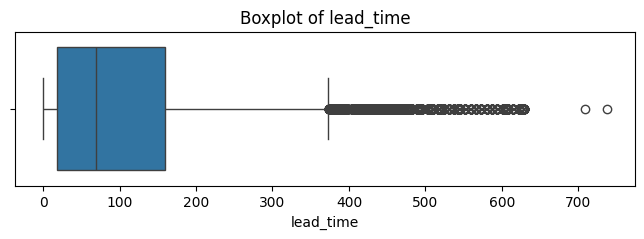

c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


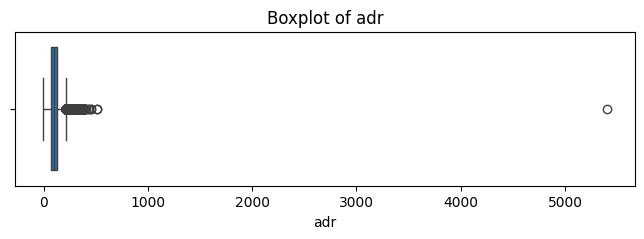

c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


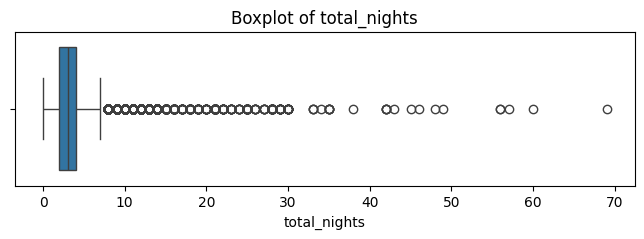

c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


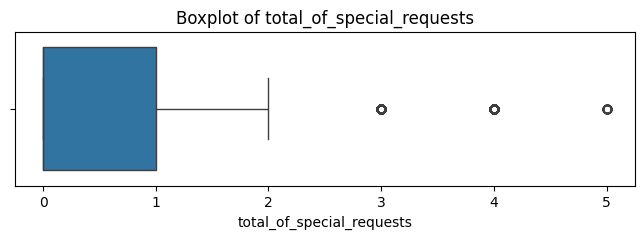

c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


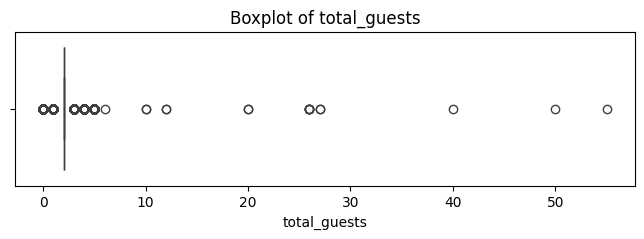

In [27]:
for col in numeric_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **2. Exploratory Data Analysis**

Univariate Analysis

1. Compare cancelled and not cancelled booking behavior

In [29]:
df['is_canceled'] = df['is_canceled'].astype(str)

Text(0, 0.5, 'Counts')

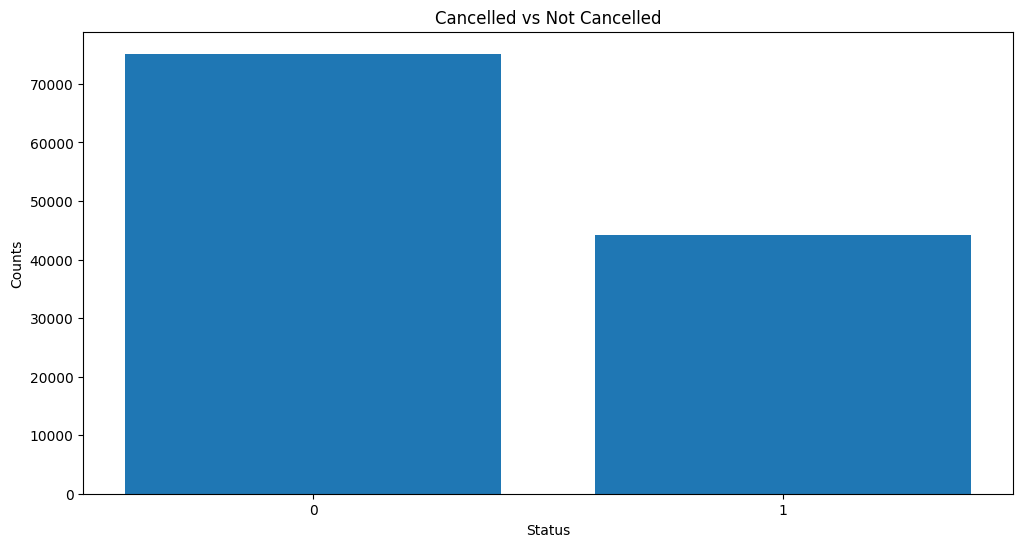

In [30]:
plt.figure(figsize=(12,6))
plt.bar(df['is_canceled'].unique(), df['is_canceled'].value_counts())
plt.title("Cancelled vs Not Cancelled") 
plt.xlabel('Status')
plt.ylabel('Counts')

2. Compare Resort vs City Hotel booking behavior

Text(0, 0.5, 'Counts')

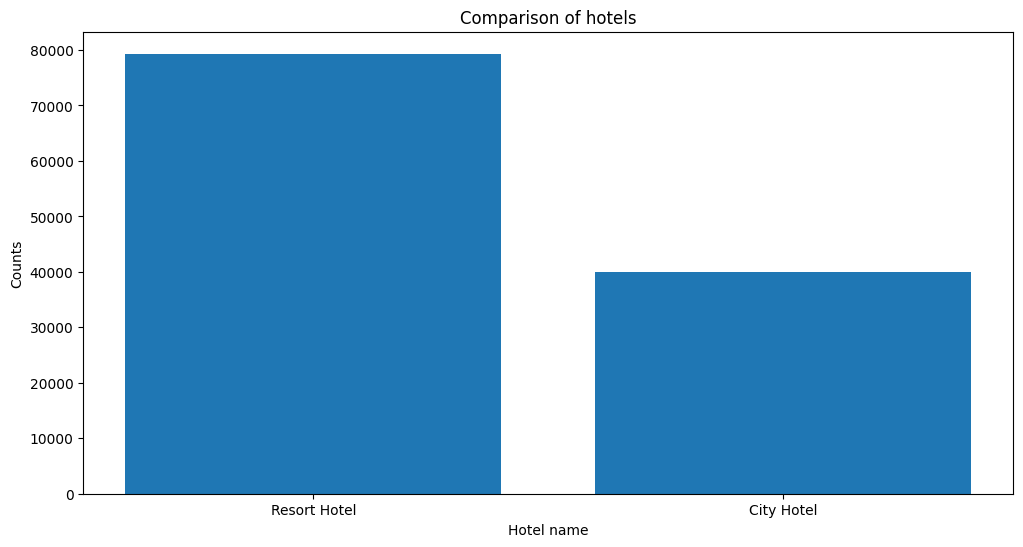

In [31]:
plt.figure(figsize=(12,6))
plt.bar(df['hotel'].unique(), df['hotel'].value_counts())
plt.title("Comparison of hotels") 
plt.xlabel('Hotel name')
plt.ylabel('Counts')

3. Compare Market segment behaviour

Text(0, 0.5, 'Counts')

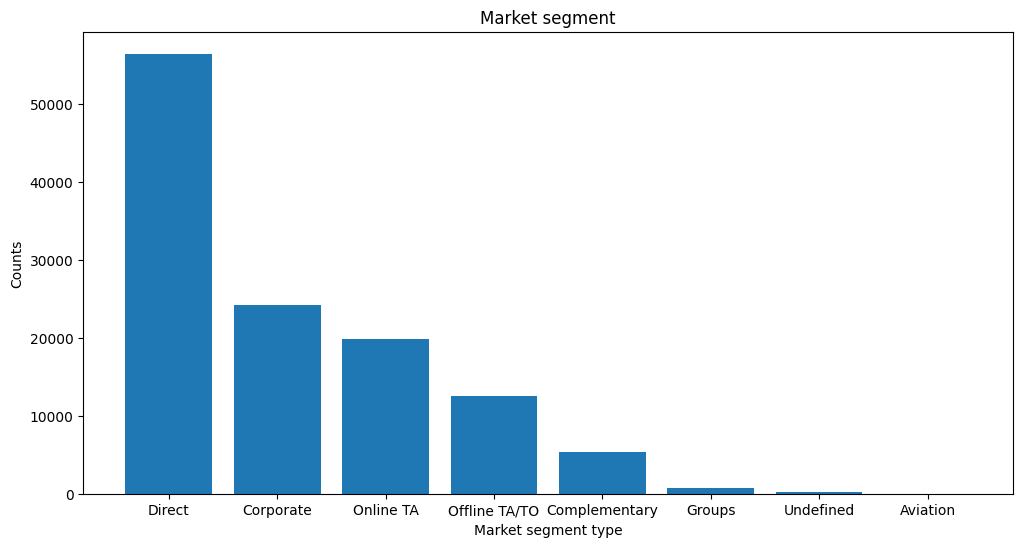

In [32]:
plt.figure(figsize=(12,6))
plt.bar(df['market_segment'].unique(), df['market_segment'].value_counts())
plt.title("Market segment") 
plt.xlabel('Market segment type')
plt.ylabel('Counts')

4. Customer type comparison

Text(0, 0.5, 'Counts')

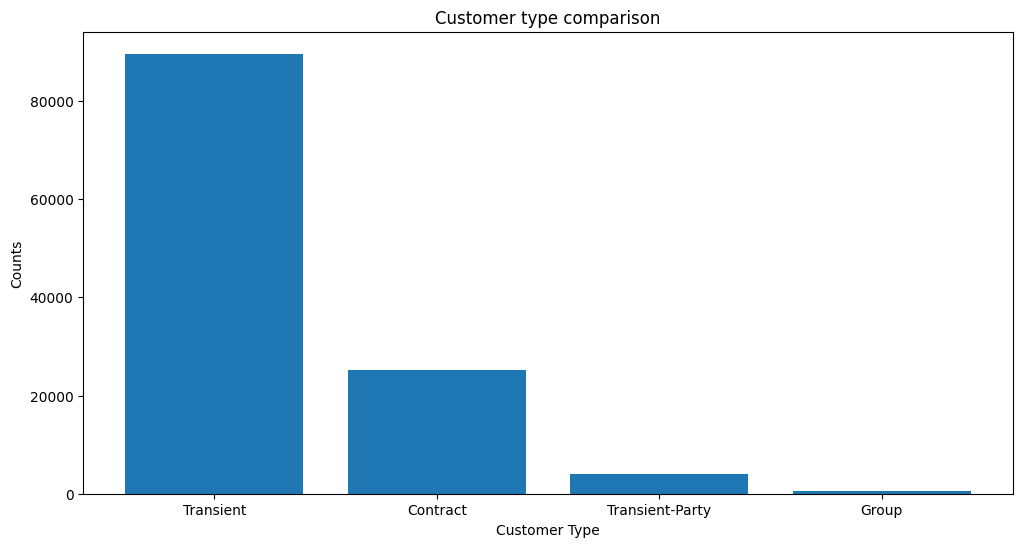

In [33]:
plt.figure(figsize=(12,6))
plt.bar(df['customer_type'].unique(), df['customer_type'].value_counts())
plt.title("Customer type comparison")
plt.xlabel('Customer Type')
plt.ylabel('Counts')

5. Repeated/Non repeated customer type comparison

Text(0, 0.5, 'Counts')

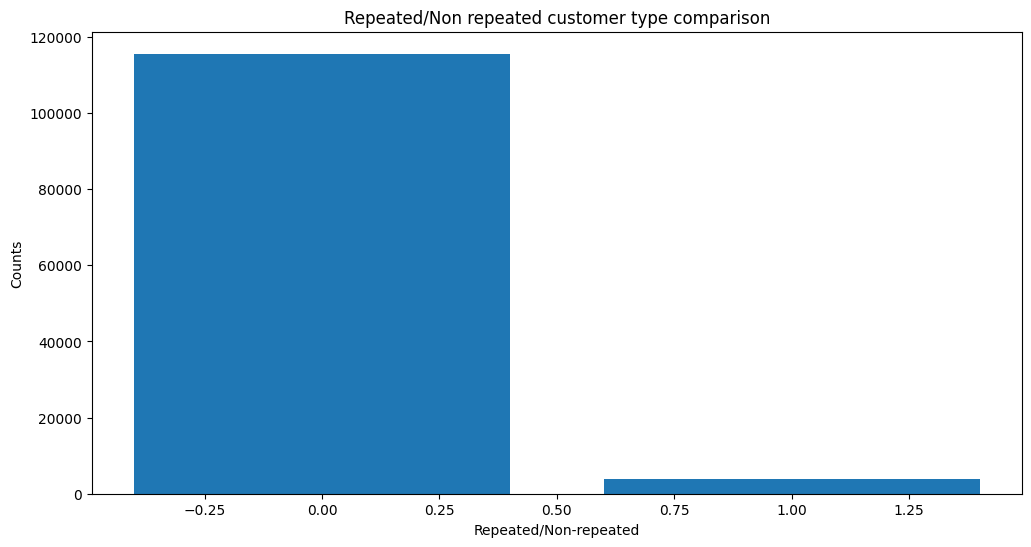

In [34]:
plt.figure(figsize=(12,6))
plt.bar(df['is_repeated_guest'].unique(), df['is_repeated_guest'].value_counts())
plt.title("Repeated/Non repeated customer type comparison")
plt.xlabel('Repeated/Non-repeated')
plt.ylabel('Counts')

6. Distribution channel comparison

Text(0, 0.5, 'Counts')

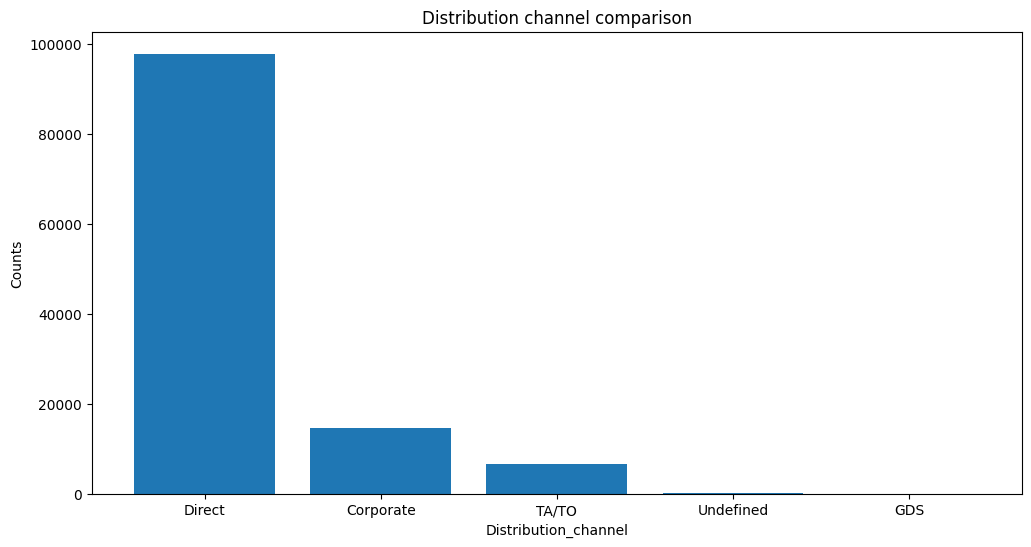

In [35]:
plt.figure(figsize=(12,6))
plt.bar(df['distribution_channel'].unique(), df['distribution_channel'].value_counts())
plt.title("Distribution channel comparison")
plt.xlabel('Distribution_channel')
plt.ylabel('Counts')

7. Meal comparison

Text(0, 0.5, 'Counts')

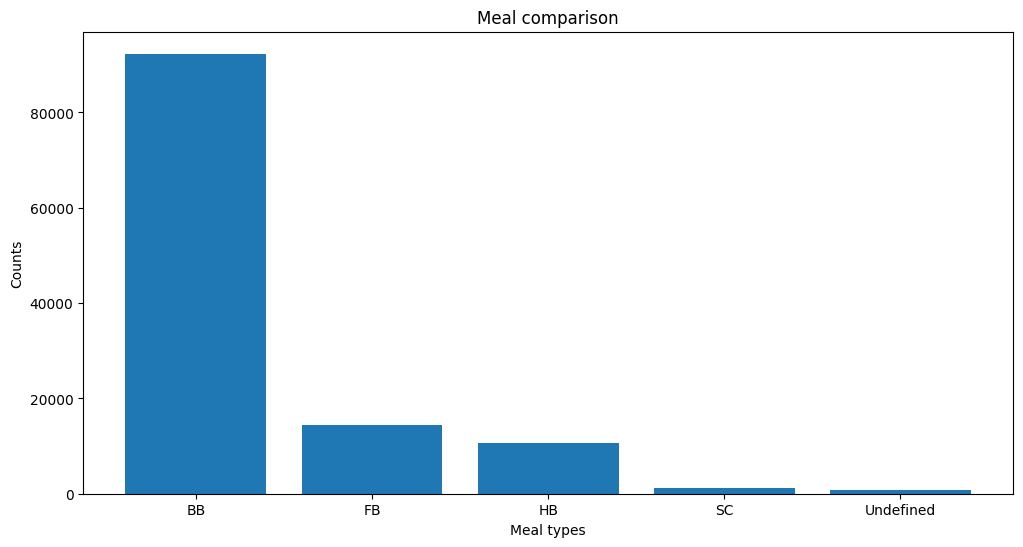

In [36]:
plt.figure(figsize=(12,6))
plt.bar(df['meal'].unique(), df['meal'].value_counts())
plt.title("Meal comparison")
plt.xlabel('Meal types')
plt.ylabel('Counts')

8. deposit_type comparison

Text(0, 0.5, 'Counts')

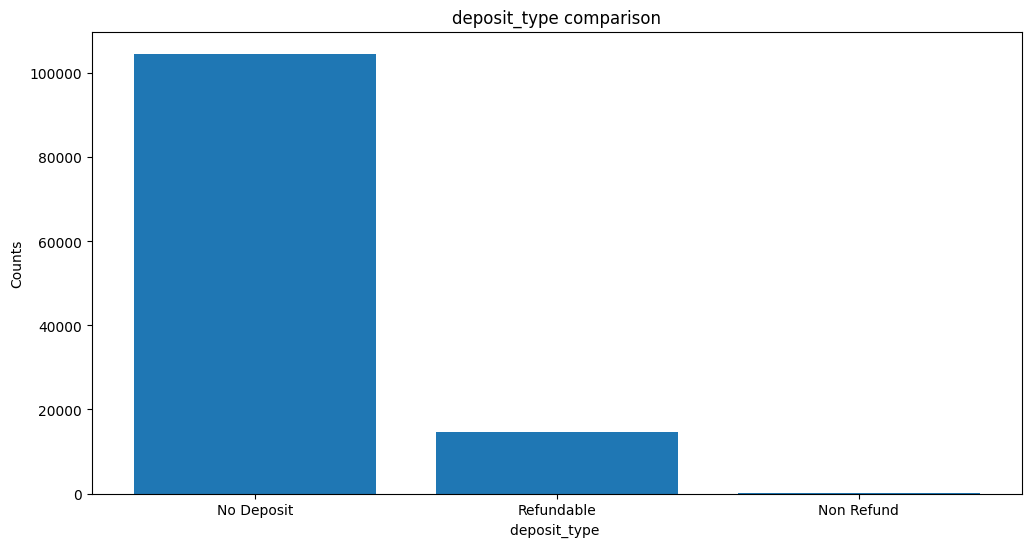

In [37]:
plt.figure(figsize=(12,6))
plt.bar(df['deposit_type'].unique(), df['deposit_type'].value_counts())
plt.title("deposit_type comparison")
plt.xlabel('deposit_type ')
plt.ylabel('Counts')

9. reserved_room_type comparison

Text(0, 0.5, 'Counts')

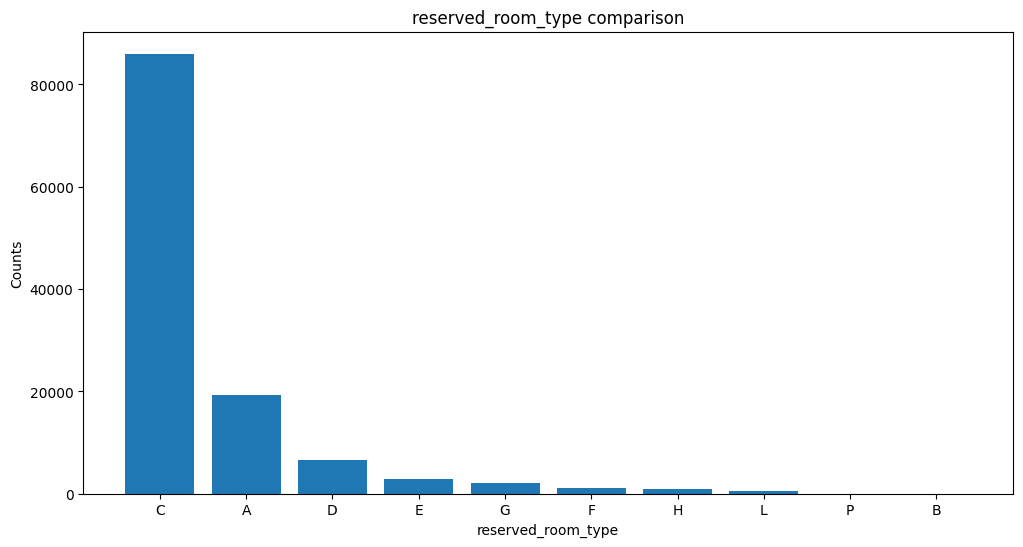

In [38]:
plt.figure(figsize=(12,6))
plt.bar(df['reserved_room_type'].unique(), df['reserved_room_type'].value_counts())
plt.title("reserved_room_type comparison")
plt.xlabel('reserved_room_type')
plt.ylabel('Counts')

10. assigned_room_type comparison


Text(0, 0.5, 'Counts')

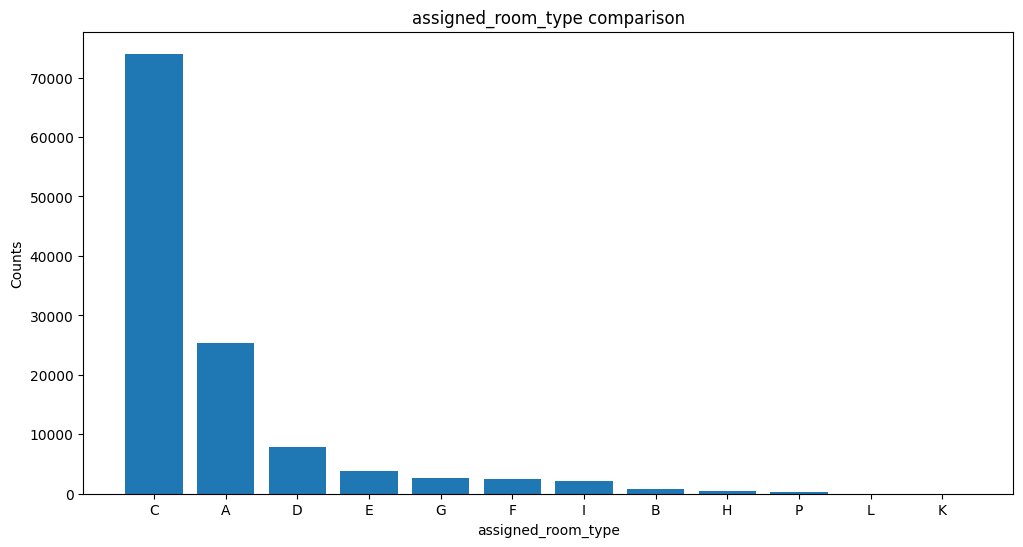

In [39]:
plt.figure(figsize=(12,6))
plt.bar(df['assigned_room_type'].unique(), df['assigned_room_type'].value_counts())
plt.title("assigned_room_type comparison")
plt.xlabel('assigned_room_type')
plt.ylabel('Counts')

11. arrival_date_year comparison

Text(0, 0.5, 'Counts')

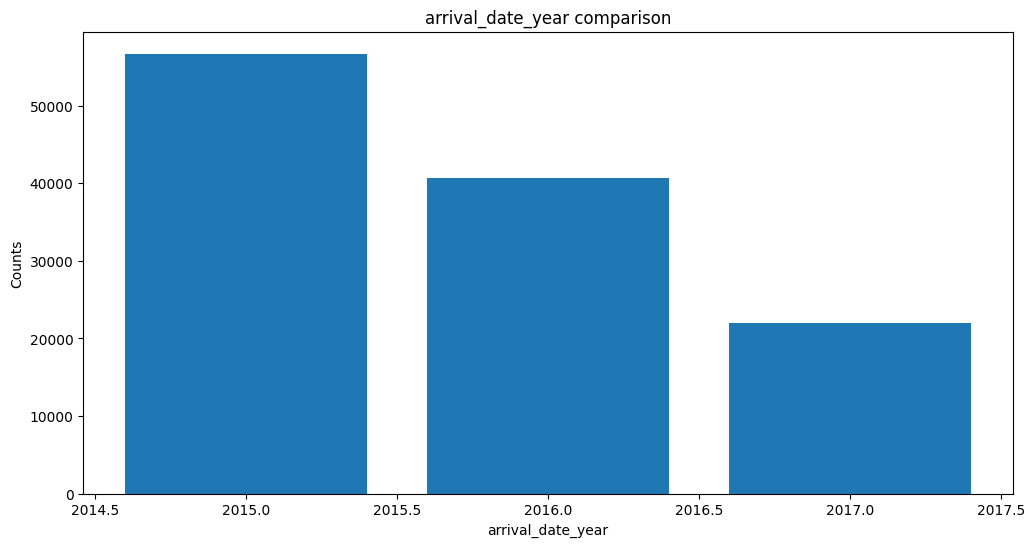

In [47]:
plt.figure(figsize=(12,6))
plt.bar(df['arrival_date_year'].unique(), df['arrival_date_year'].value_counts())
plt.title("arrival_date_year comparison")
plt.xlabel('arrival_date_year')
plt.ylabel('Counts')

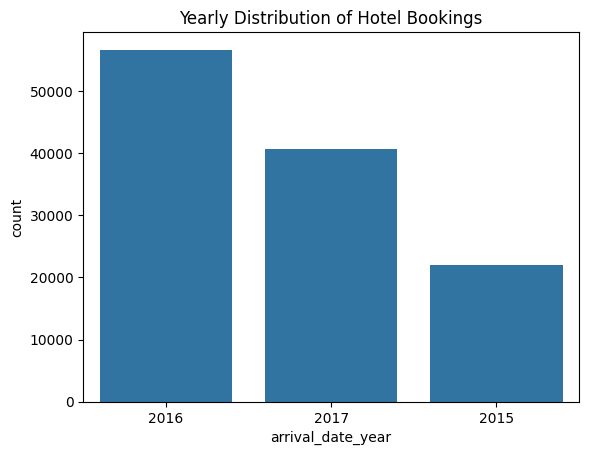

In [48]:
sns.countplot(x='arrival_date_year', data=df, order=df['arrival_date_year'].value_counts().index)
plt.title("Yearly Distribution of Hotel Bookings")
plt.show()

Univariate
 Histogram for continuous data

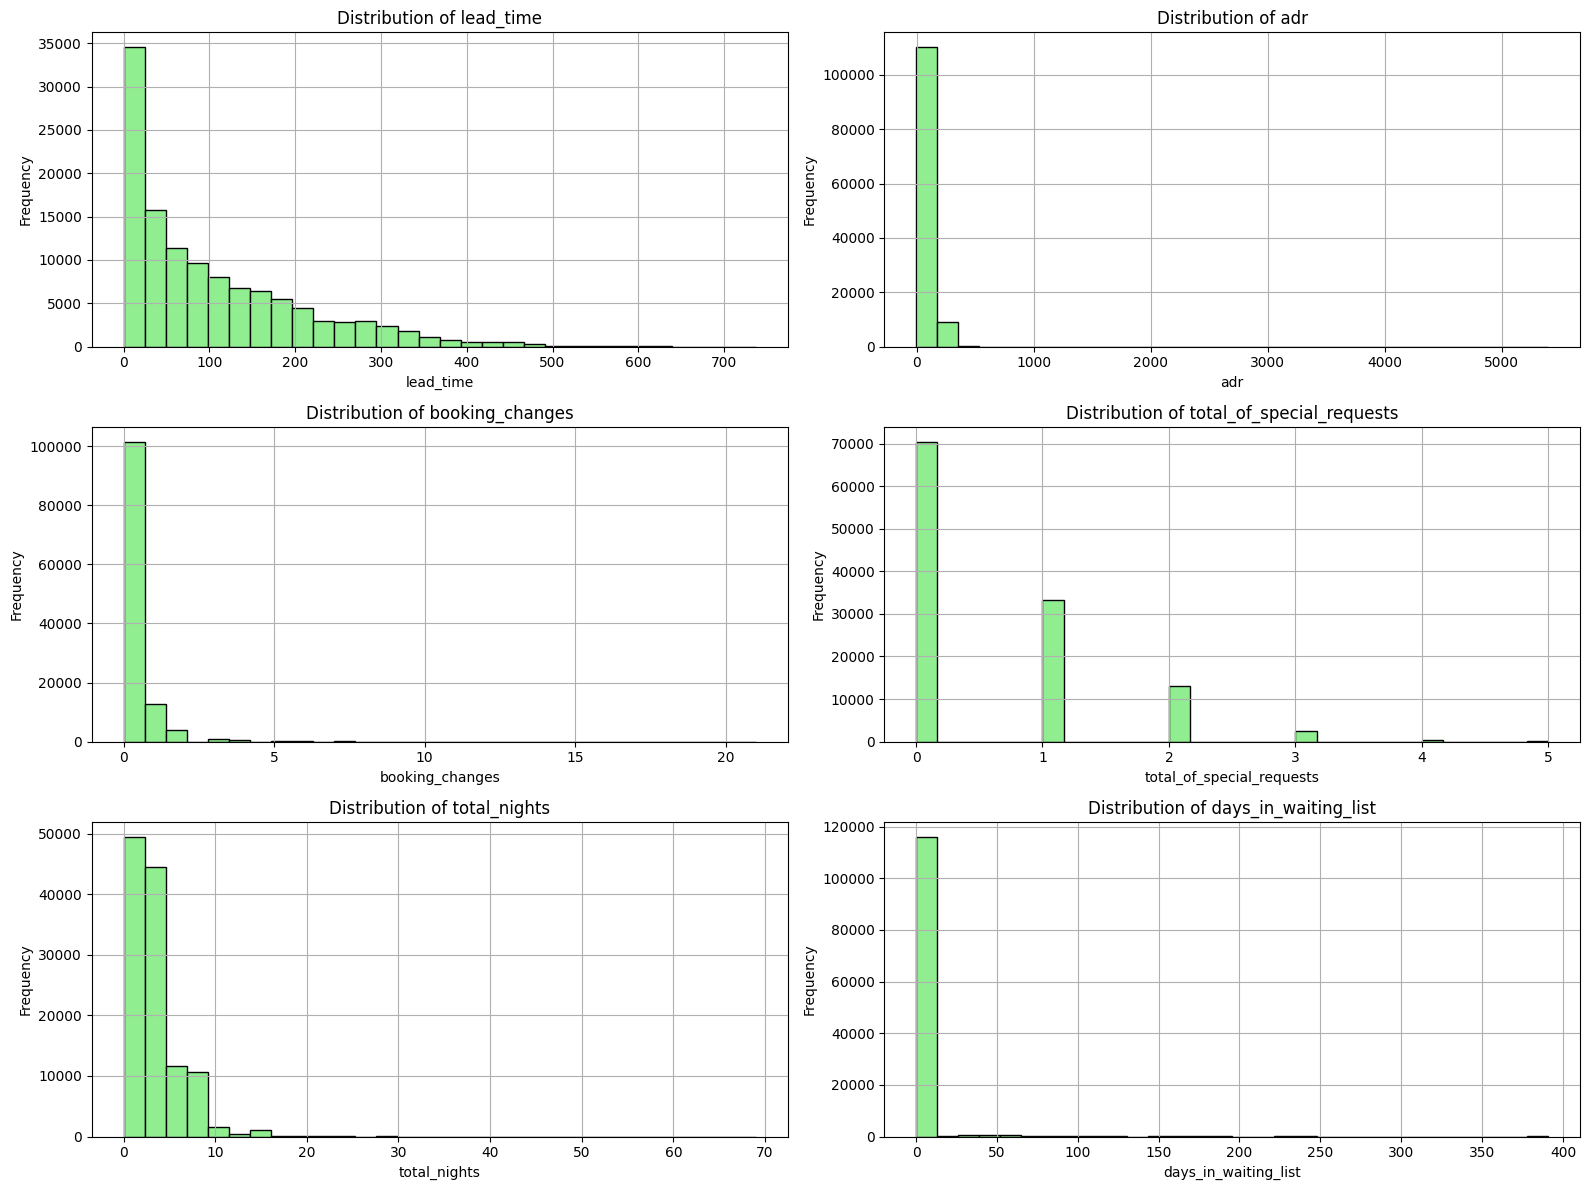

In [49]:
import matplotlib.pyplot as plt

cols = ['lead_time', 'adr', 'booking_changes', 'total_of_special_requests',
        'total_nights', 'days_in_waiting_list']

# Set up the subplot grid
plt.figure(figsize=(16, 12))  # Adjust as needed

for i, col in enumerate(cols):
    plt.subplot(3, 2, i + 1)  # 3 rows x 2 columns grid
    plt.hist(df[col], bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


# Multi-variate analysis

lead_time vs adr (average daily rate):

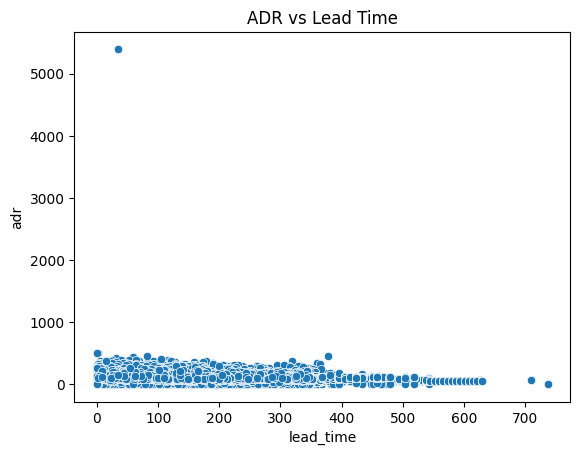

In [50]:
sns.scatterplot(x='lead_time', y='adr', data=df)
plt.title('ADR vs Lead Time')
plt.show()


lead_time vs adr (average daily rate) with hue = customer_type

Text(0.5, 1.0, 'Lead Time vs ADR by Customer Type')

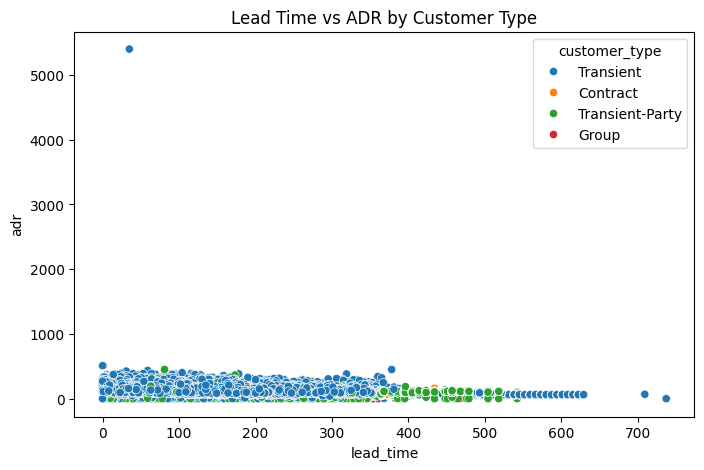

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='lead_time', y='adr', hue='customer_type')
plt.title('Lead Time vs ADR by Customer Type')

 Box Plot — ADR vs market_segment
 Compare price differences across market segments.

c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='market_segment', ylabel='adr'>

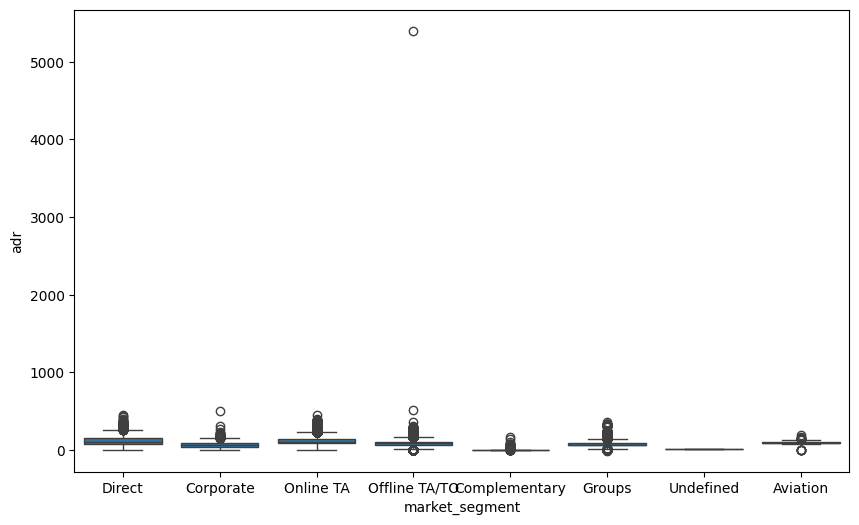

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='market_segment', y='adr')

Grouped bar plot of hotel with hue (cancelled, not-cancelled)

c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


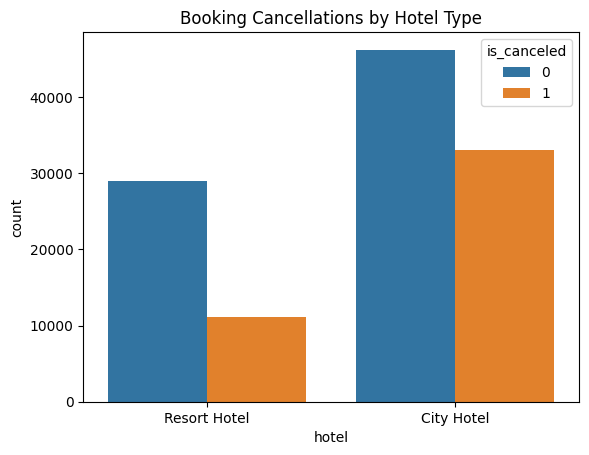

In [54]:
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Booking Cancellations by Hotel Type')
plt.show()

Scatter-plot of total_nights vs adr , with hue (cancelled/not-cancelled)

Text(0.5, 1.0, 'ADR vs Total Nights (colored by Cancellation)')

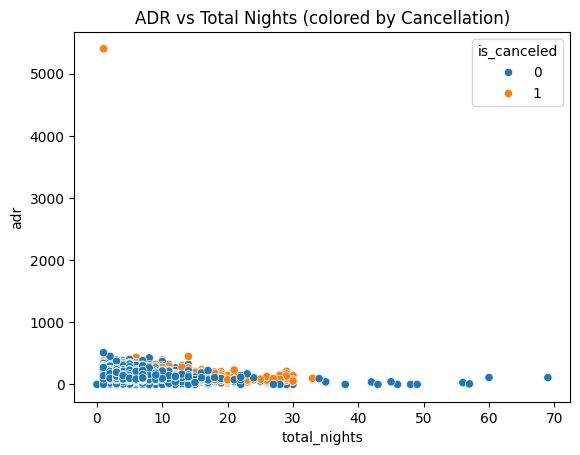

In [55]:
sns.scatterplot(x='total_nights', y='adr', hue='is_canceled', data=df)
plt.title('ADR vs Total Nights (colored by Cancellation)')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [58]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

**Time-series analysis of booking trends.**

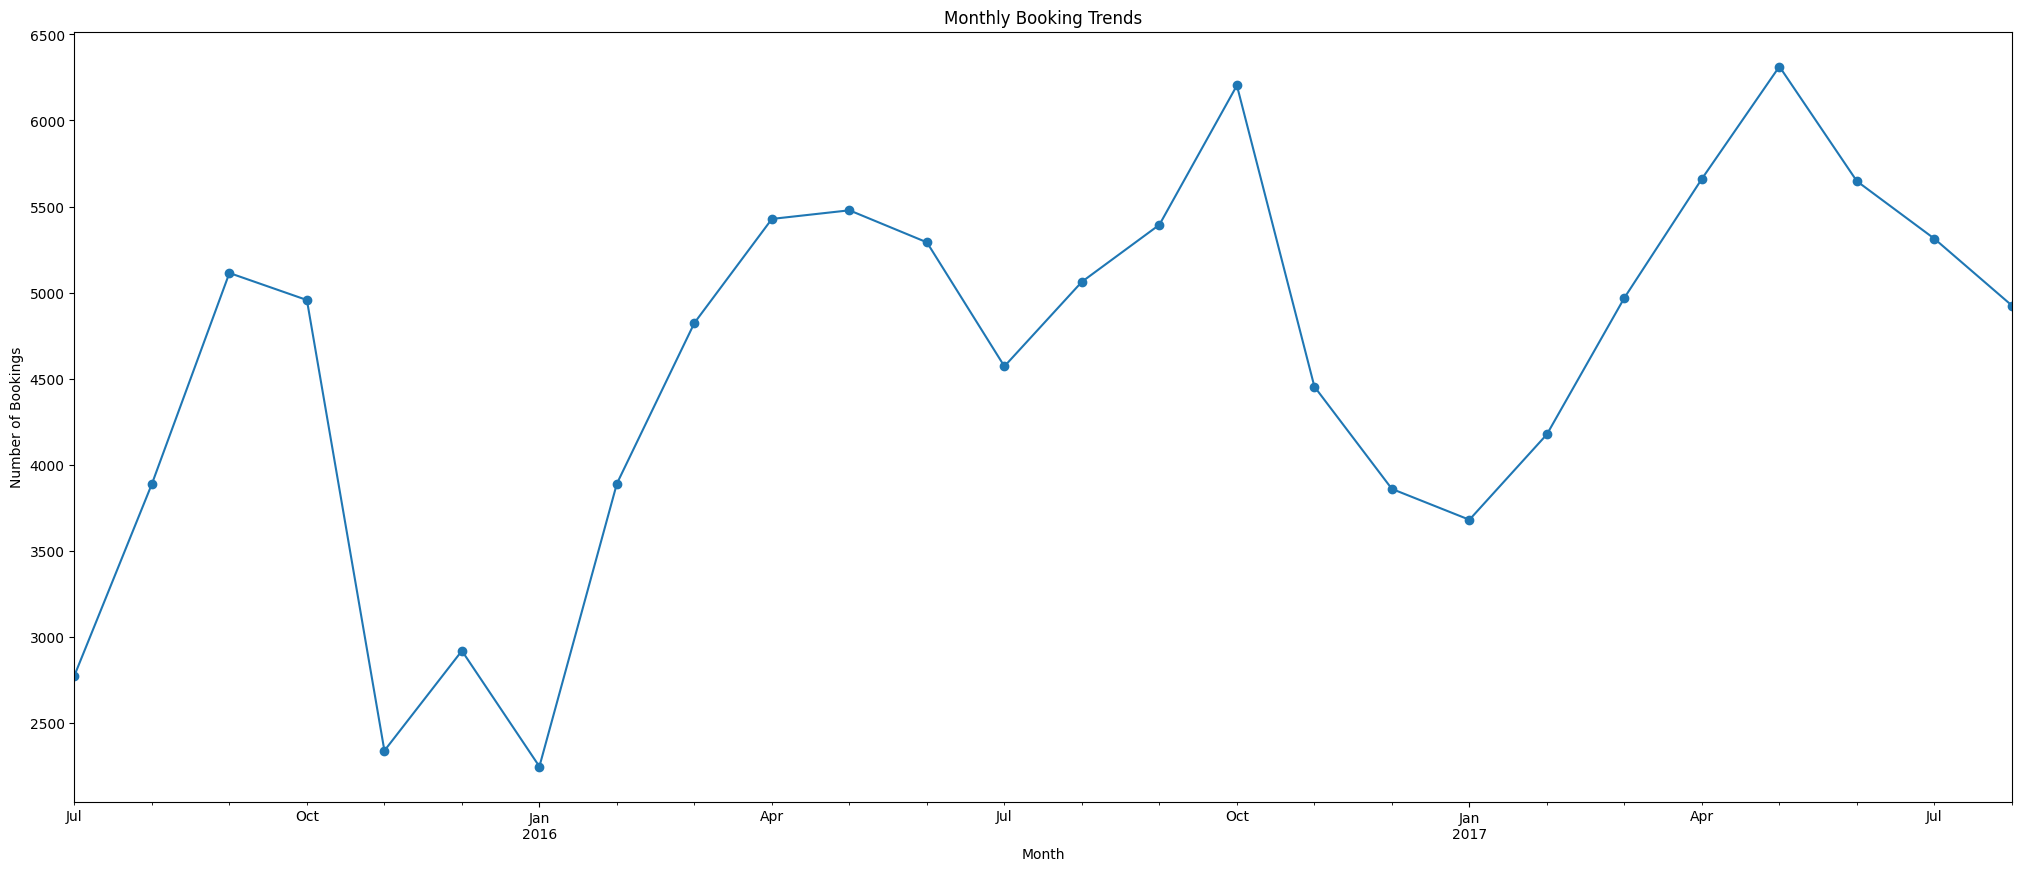

In [59]:
monthly_bookings = df.groupby(df['arrival_date'].dt.to_period('M')).size()

monthly_bookings.plot(kind='line', figsize=(25,10), marker='o')
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

In above graph, I understood how bookings change over time (monthly or weekly trends)

**Guest demographics and distribution by country.**

In [60]:
top_countries = df['country'].value_counts().head(10)
top_countries


country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

C:\Users\Adhyatm\AppData\Local\Temp\ipykernel_19276\4252234059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gr

Text(0, 0.5, 'Number of Bookings')

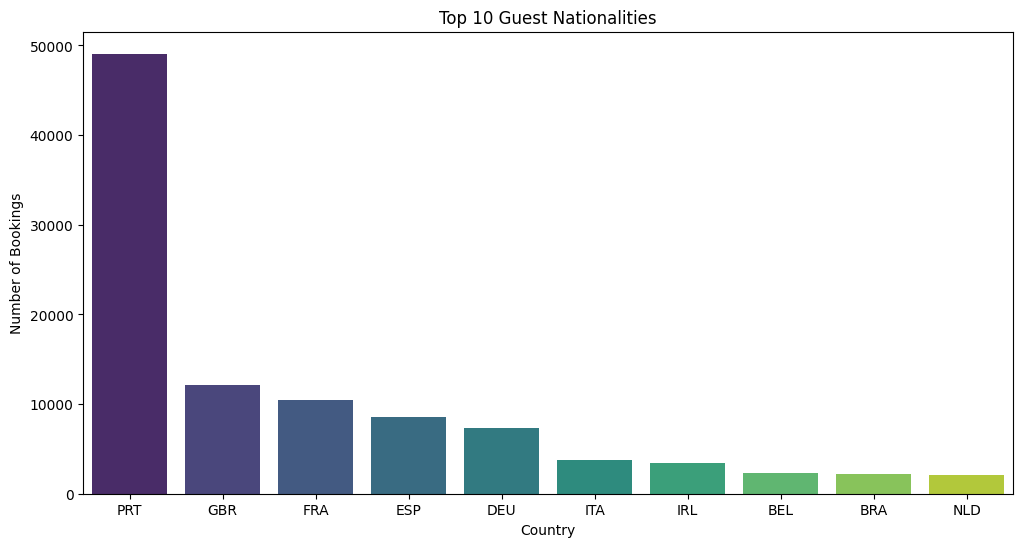

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Guest Nationalities')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')

From the above graph , I got to know where most guests come from.

 **Market segment share and ADR (Average Daily Rate) comparison.**

In [62]:
market_segment_counts = df['market_segment'].value_counts()
market_segment_counts

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [63]:
adr_by_segment = df.groupby('market_segment')['adr'].mean()


C:\Users\Adhyatm\AppData\Local\Temp\ipykernel_19276\3105871136.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels())


[Text(0, 0, 'Online TA'),
 Text(1, 0, 'Offline TA/TO'),
 Text(2, 0, 'Groups'),
 Text(3, 0, 'Direct'),
 Text(4, 0, 'Corporate'),
 Text(5, 0, 'Complementary'),
 Text(6, 0, 'Aviation'),
 Text(7, 0, 'Undefined')]

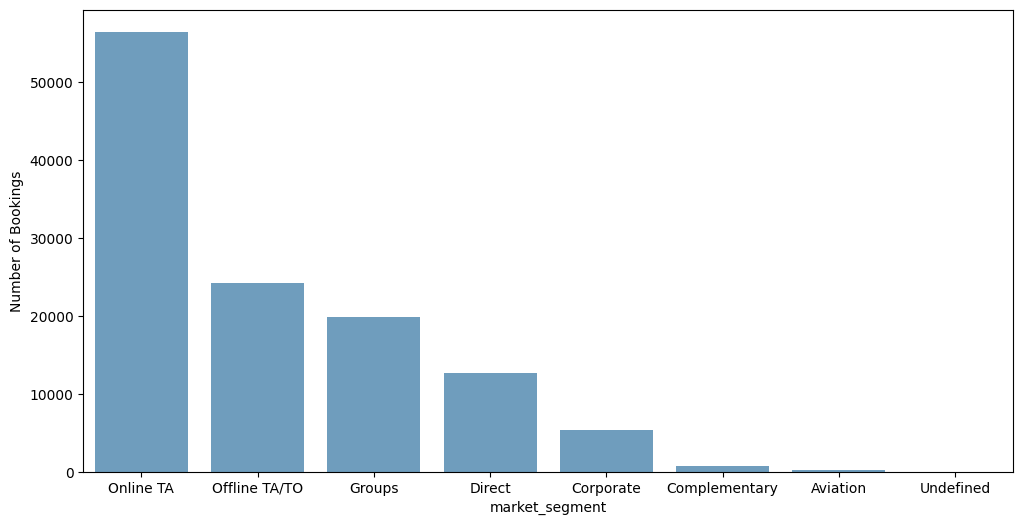

In [64]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, ax=ax1, alpha=0.7)
ax1.set_ylabel('Number of Bookings')
ax1.set_xticklabels(ax1.get_xticklabels())

**Booking lead time distribution across customer types**



c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 0, 'Customer Type')

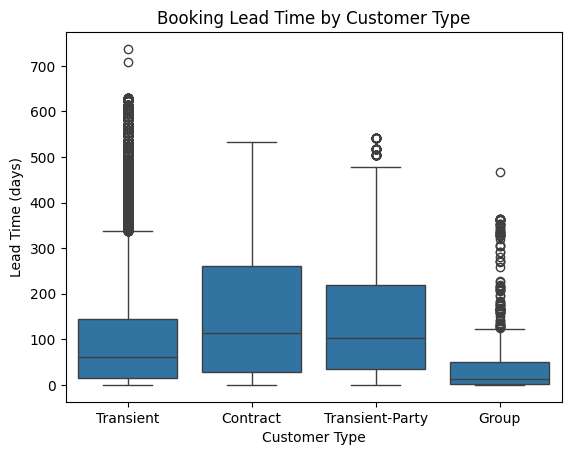

In [65]:
sns.boxplot(x='customer_type', y='lead_time', data=df)
plt.title('Booking Lead Time by Customer Type')
plt.ylabel('Lead Time (days)')
plt.xlabel('Customer Type')


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  int64         
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

# **3. Correlation Analysis**

1. Compute Pearson correlation matrix for numeric feature.

In [67]:
numeric_cols = ['lead_time', 'adr', 'booking_changes', 
                'total_of_special_requests', 'days_in_waiting_list', 
               'total_nights']

<Axes: >

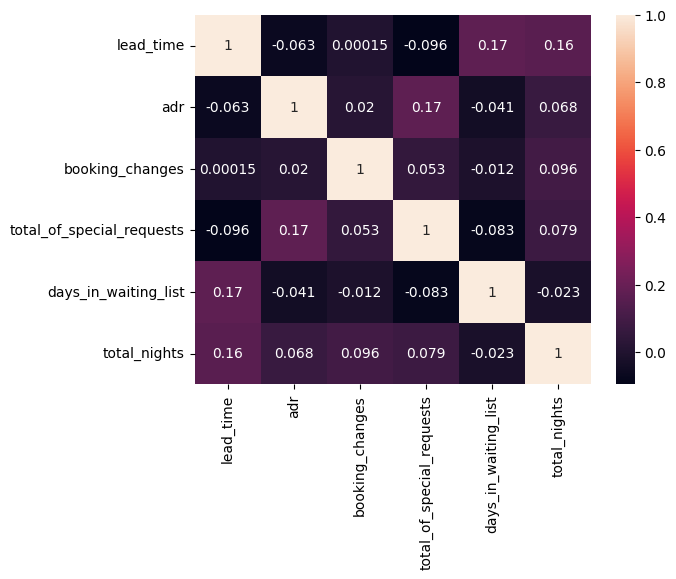

In [68]:
sns.heatmap(df[numeric_cols].corr(), annot=True)

2. Explore how strongly adr is influenced by lead time, special requests, and booking changes


In [69]:
np.corrcoef(df.lead_time, df.adr)

array([[ 1.        , -0.06307685],
       [-0.06307685,  1.        ]])

In [70]:
np.corrcoef(df.total_of_special_requests, df.adr)

array([[1.        , 0.17218526],
       [0.17218526, 1.        ]])

In [71]:
np.corrcoef(df.booking_changes, df.adr)

array([[1.        , 0.01961767],
       [0.01961767, 1.        ]])

**As the magnitude of coefficient of co-relation of 'total_of_special_requests' vs 'adr' is closer to 1, strength of their relationship is strong. And as the value of r is +ve, it's a direct co-relation.**

In [72]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_date,reservation_status_date,total_guests,total_nights,total_revenue
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015/07/01,2.0,0,0.0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015/07/01,2.0,0,0.0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-01,2015/07/02,1.0,1,75.0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-01,2015/07/02,1.0,1,75.0
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-01,2015/07/03,2.0,2,196.0


In [ ]:
df['distribution_channel'].unique()

# **4. Hypothesis Testing**

**1. Ho: There is no difference in ADR between bookings made through Online TA and Direct channels**

In [73]:
adr_online = np.where(df['distribution_channel']=='TA/TO')
a = df.iloc[adr_online]
a1 = a['adr']
a1

4          98.00
5          98.00
8          82.00
9         105.50
10        123.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 97870, dtype: float64

In [74]:
adr_direct = np.where(df['distribution_channel']=='Direct')
b = df.iloc[adr_direct]
b1 = b['adr']
b1

0           0.00
1           0.00
2          75.00
6         107.00
7         103.00
           ...  
119358    143.10
119365    266.75
119368     99.00
119369     96.25
119381     99.00
Name: adr, Length: 14645, dtype: float64

In [75]:
# using a 2 sample t test

ssw.ztest(a1, b1, value=0, alternative='two-sided')  

# test-statistic is -7.482310991727907 and p-value is 7.302688034155966e-14

(-7.482310991727907, 7.302688034155966e-14)

`**As p-value < 0.05 we Reject H₀ that means there is Significant difference in ADR.**

**2. Ho: Average stay duration does not differ between customer types**

In [76]:
mod1 = ols('total_nights ~ customer_type', data = df).fit()


In [77]:
tb1 = sm.stats.anova_lm(mod1)
tb1

,df,sum_sq,mean_sq,F,PR(>F)
customer_type,3.0,18121.308846,6040.436282,945.462484,0.0
Residual,119386.0,762741.555723,6.388869,NaN,NaN


**As p-value 0 < 0.05, we reject the Ho, no significant difference in stay duration**

**3. Ho: Room upgrades are independent of lead time**

In [78]:
df['is_upgraded'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)



In [79]:
ssw.ztest(df[df['is_upgraded'] == 1]['lead_time'], df[df['is_upgraded'] == 0]['lead_time'], value = 0)

(-49.64543059196787, 0.0)

**As p-value 0 < 0.05, we reject the Ho, No evidence that lead time affects upgrades.**

# 5. Key Business Questions

**1. What influences ADR the most?**

In [80]:
correlation = df.corr(numeric_only=True)['adr'].sort_values(ascending=False)
print("Top correlations with ADR:\n", correlation.head(10))


Top correlations with ADR:
 adr                          1.000000
total_revenue                0.565766
total_guests                 0.368105
children                     0.324853
adults                       0.230641
arrival_date_year            0.197580
total_of_special_requests    0.172185
arrival_date_month           0.079315
arrival_date_week_number     0.075791
total_nights                 0.067945
Name: adr, dtype: float64


**As the magnitude of co-relation coefficient of total_revenue vs adr is close to 1, so we can consclude that total_revenue influences adr the most**

In [121]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_date,reservation_status_date,total_guests,total_nights,total_revenue,is_upgraded,room_matched
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,2015/07/01,2.0,0,0.00,0,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,2015/07/01,2.0,0,0.00,0,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,2015-07-01,2015/07/02,1.0,1,75.00,1,0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,2015-07-01,2015/07/02,1.0,1,75.00,0,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,2015-07-01,2015/07/03,2.0,2,196.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,0,Check-Out,2017-08-30,2017/09/06,2.0,7,672.98,0,1
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,2,Check-Out,2017-08-31,2017/09/07,3.0,7,1578.01,0,1
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,4,Check-Out,2017-08-31,2017/09/07,2.0,7,1103.97,0,1
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,0,Check-Out,2017-08-31,2017/09/07,2.0,7,730.80,0,1


2. Do guests who book earlier tend to request more changes?


In [81]:
np.corrcoef(df['lead_time'], df['booking_changes'])



array([[1.00000000e+00, 1.48830073e-04],
       [1.48830073e-04, 1.00000000e+00]])

**The correlation is almost zero → practically no relationship.
 p-value < 0.05 → not statistically significant.**

3. Are there pricing or booking differences across countries?


In [83]:
country_stats = df.groupby('country')[['adr', 'lead_time']].mean()

top_countries = country_stats.sort_values(by='adr', ascending=False).head(15)

top_countries = top_countries.reset_index()
print(top_countries)

   country         adr   lead_time
0      DJI  273.000000    0.000000
1      AIA  265.000000    0.000000
2      AND  202.652857   47.000000
3      UMI  200.000000   11.000000
4      LAO  181.665000    2.500000
5      MYT  177.750000  208.000000
6      NCL  175.500000  116.000000
7      GEO  169.015909   97.681818
8      COM  165.305000   22.500000
9      FRO  155.200000  286.400000
10     PHL  154.355750   58.050000
11     GIB  150.402222  117.277778
12     BGD  149.802500   28.083333
13     SLV  148.850000   49.000000
14     BHR  145.330000  173.800000


**There is significant variation in ADR and lead time across countries. While some small countries show high ADRs (likely due to niche, high-value bookings), a more stable picture can be seen by analyzing top 10 most frequent guest countries.**

4. Is there a pattern in room upgrades or reassignment?

In [84]:
df['is_upgraded'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)

upgrade_counts = df['is_upgraded'].value_counts(normalize=True).rename({0: 'No Upgrade', 1: 'Upgraded'}) * 100
print("Overall Room Assignment Status (%):\n", upgrade_counts)

upgrade_by_room = df.groupby('reserved_room_type')['is_upgraded'].mean().sort_values(ascending=False) * 100
print("\nUpgrade Rate by Reserved Room Type (%):\n", upgrade_by_room)

Overall Room Assignment Status (%):
 is_upgraded
No Upgrade    87.505654
Upgraded      12.494346
Name: proportion, dtype: float64

Upgrade Rate by Reserved Room Type (%):
 reserved_room_type
L    83.333333
A    14.414959
B    11.627907
E     9.364958
D     7.629811
F     6.558509
C     5.257511
H     2.828619
G     2.531041
P     0.000000
Name: is_upgraded, dtype: float64


5. Are reserved room types consistently matched with assigned room types?


In [87]:
# Match rate calculation

df['room_matched'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)
match_counts = df['room_matched'].value_counts(normalize=True).rename({1: 'Matched', 0: 'Mismatched'}) * 100
print("Room Match Status (%):\n", match_counts)

# Mismatch count by reserved room type

mismatch_by_room = df[df['room_matched'] == 0].groupby('reserved_room_type')['room_matched'].count().sort_values(ascending=False)
print("\nRoom Type-wise Mismatched Bookings:\n", mismatch_by_room)


Room Match Status (%):
 room_matched
Matched       87.505654
Mismatched    12.494346
Name: proportion, dtype: float64

Room Type-wise Mismatched Bookings:
 reserved_room_type
A    12396
D     1465
E      612
F      190
B      130
G       53
C       49
H       17
L        5
Name: room_matched, dtype: int64


**Around 12.5% of bookings experience a room reassignment. Most mismatches originate from Room Type A, which is probably the default or base-level option.**

6. What are the most common guest demographics (e.g., group size, nationality)?


In [89]:

group_size_counts = df['total_guests'].value_counts().sort_index()
group_size_counts.head(10)



total_guests
0.0       180
1.0     22581
2.0     82051
3.0     10495
4.0      3929
5.0       137
6.0         1
10.0        2
12.0        2
20.0        2
Name: count, dtype: int64

In [90]:
top_nationalities = df['country'].value_counts().head(10)
top_nationalities

country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

 **Majority of guests are from European countries, especially Portugal (likely due to hotel location).**

7. Are there patterns in guest types (e.g., transient vs. corporate) that influence booking behavior? 


In [96]:
df['is_canceled'] = df['is_canceled'].astype(int)  # or float if needed


In [97]:
customer_stats = df.groupby('customer_type')[['adr', 'lead_time', 'is_canceled']].mean()

customer_counts = df['customer_type'].value_counts()
customer_stats['booking_count'] = customer_counts

customer_stats = customer_stats.sort_values(by='adr', ascending=False).reset_index()
customer_stats


,customer_type,adr,lead_time,is_canceled,booking_count
0,Transient,107.013621,93.295515,0.407463,89613
1,Contract,87.549637,142.969823,0.309617,4076
2,Transient-Party,86.084253,137.037056,0.254299,25124
3,Group,83.488579,55.057192,0.102253,577


**Transient guests drive the highest revenue but also carry the highest cancellation risk. In contrast, group and contract bookings are more stable but offer lower ADR. This suggests a tradeoff between profitability and booking consistency.**

8. How does booking lead time vary across customer types and countries?


C:\Users\Adhyatm\AppData\Local\Temp\ipykernel_19276\1375299389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='customer_type', y='lead_time', data=df, palette='Set2')
c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-p

Text(0.5, 0, 'Customer Type')

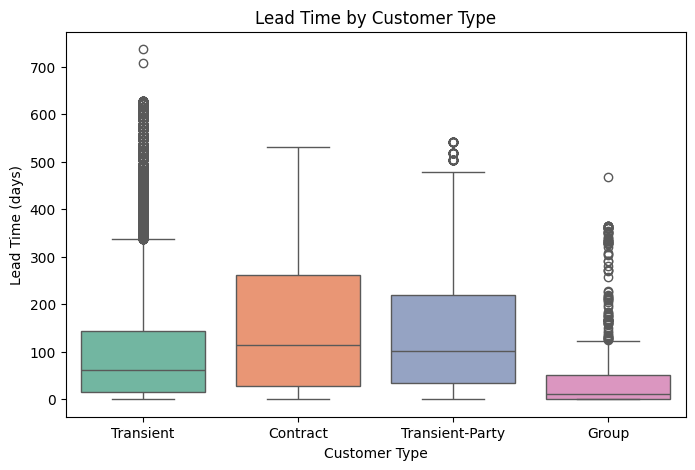

In [98]:
# boxplot: Lead time by customer type

plt.figure(figsize=(8, 5))
sns.boxplot(x='customer_type', y='lead_time', data=df, palette='Set2')
plt.title("Lead Time by Customer Type")
plt.ylabel("Lead Time (days)")
plt.xlabel("Customer Type")


In [99]:
top_countries = df['country'].value_counts().head(5).index
df_top_countries = df[df['country'].isin(top_countries)]


C:\Users\Adhyatm\AppData\Local\Temp\ipykernel_19276\2531110538.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='lead_time', data=df_top_countries, palette='Set3')
c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\users\adhyatm\appdata\local\programs\python\python39\li

Text(0.5, 0, 'Country')

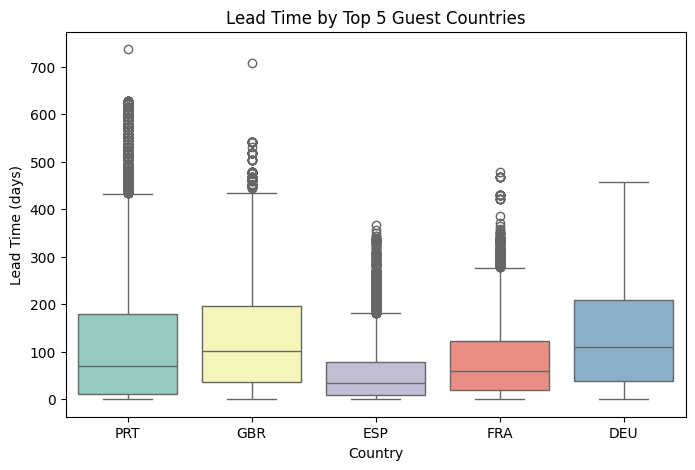

In [100]:
# boxplot: Lead time by country (top 5)

plt.figure(figsize=(8, 5))
sns.boxplot(x='country', y='lead_time', data=df_top_countries, palette='Set3')
plt.title("Lead Time by Top 5 Guest Countries")
plt.ylabel("Lead Time (days)")
plt.xlabel("Country")


**Transient guests are the most unpredictable, while Contract bookings are more long-term.**

**Portugal (PRT) and UK (GBR) show relatively low median lead times — guests often book closer to arrival.**

**France (FRA), Spain (ESP), and  Germany (DEU) show slightly longer lead times.**

**Domestic or nearby countries (like Portugal) book later, while international guests plan further ahead.**



9. Are longer lead times associated with fewer booking changes or cancellations?


Text(0, 0.5, 'Number of Booking Changes')

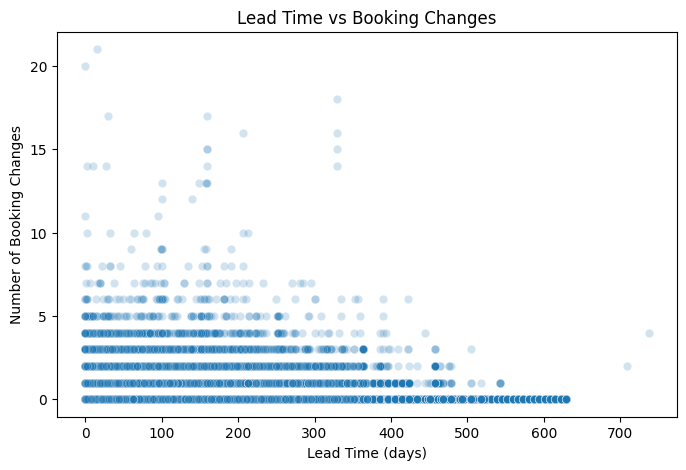

In [101]:
#Scatter plot of lead_time vs booking_changes

plt.figure(figsize=(8, 5))
sns.scatterplot(x='lead_time', y='booking_changes', data=df, alpha=0.2)
plt.title("Lead Time vs Booking Changes")
plt.xlabel("Lead Time (days)")
plt.ylabel("Number of Booking Changes")



C:\Users\Adhyatm\AppData\Local\Temp\ipykernel_19276\326877275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='lead_time', data=df, palette='pastel')
c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-pa

Text(0, 0.5, 'Lead Time (days)')

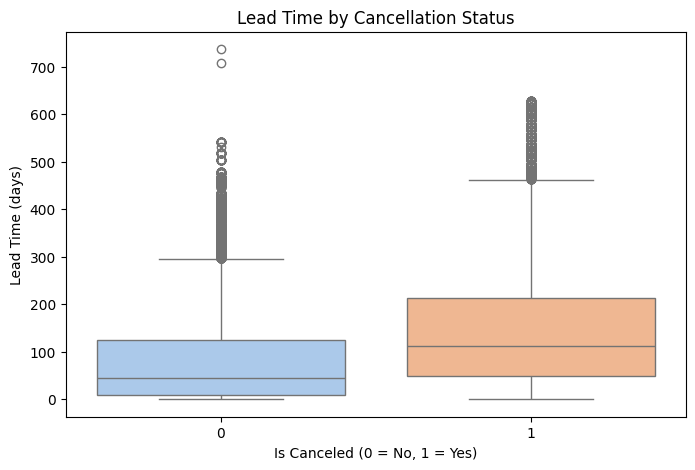

In [102]:
# Boxplot of lead_time by cancellation status

plt.figure(figsize=(8, 5))
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette='pastel')
plt.title("Lead Time by Cancellation Status")
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Lead Time (days)")

 **Long lead time is weakly linked to higher cancellation rates, but has no real effect on how often bookings are modified. Hotels might consider flexible pricing or policies for long-lead bookings to reduce cancellations.**

10. What is the typical duration of stay, and how does it vary by customer type or segment?


In [104]:

stay_by_customer_type = df.groupby('customer_type')['total_nights'].mean().sort_values(ascending=False)
stay_by_market_segment = df.groupby('market_segment')['total_nights'].mean().sort_values(ascending=False)

stay_by_customer_type, stay_by_market_segment


(customer_type
 Contract           5.320658
 Transient          3.447145
 Transient-Party    3.064719
 Group              2.882149
 Name: total_nights, dtype: float64,
 market_segment
 Offline TA/TO    3.903877
 Aviation         3.607595
 Online TA        3.573986
 Direct           3.205775
 Groups           2.992529
 Corporate        2.092918
 Complementary    1.647376
 Undefined        1.500000
 Name: total_nights, dtype: float64)

**Customers with corporate contracts or those using travel agencies typically stay longer. In contrast, corporate bookings are short-stay, high-frequency, and complementary guests (free stays) tend to have the shortest stays.**

11. How often are guests upgraded or reassigned to a different room type?


In [106]:

upgrade_distribution = df['is_upgraded'].value_counts(normalize=True).rename({0: 'No Upgrade', 1: 'Upgraded'}) * 100
upgrade_distribution

is_upgraded
No Upgrade    87.505654
Upgraded      12.494346
Name: proportion, dtype: float64

**Room upgrades or reassignments happen in ~12.5% of cases — likely due to overbooking, room availability, or guest satisfaction strategies.**

12. Are guests who make special requests more likely to experience booking changes or longer stays?


c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


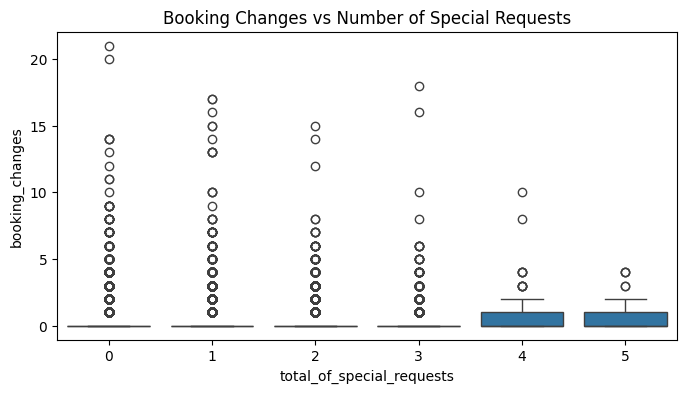

In [107]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='total_of_special_requests', y='booking_changes', data=df)
plt.title("Booking Changes vs Number of Special Requests")
plt.show()



c:\users\adhyatm\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


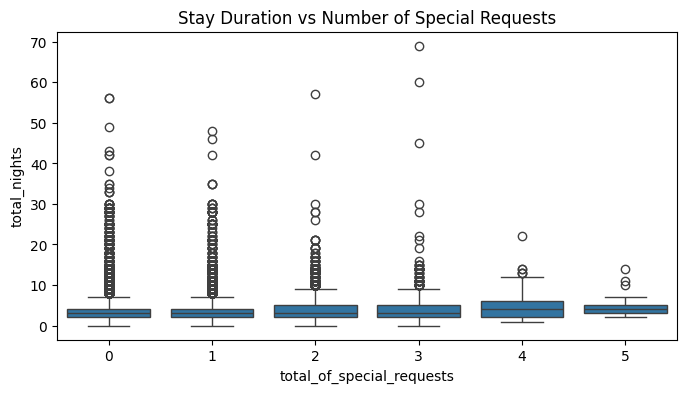

In [109]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='total_of_special_requests', y='total_nights', data=df)
plt.title("Stay Duration vs Number of Special Requests")
plt.show()

In [111]:
np.corrcoef(df.total_of_special_requests, df.booking_changes)

array([[1.        , 0.05283344],
       [0.05283344, 1.        ]])

In [112]:
np.corrcoef(df.total_of_special_requests, df.total_nights)

array([[1.        , 0.07925878],
       [0.07925878, 1.        ]])

**Both correlations are positive but weak.**
**Guests who make more special requests tend to stay slightly longer and make marginally more booking changes**


13. Do certain market segments or distribution channels show higher booking consistency or revenue?


In [113]:
segment_stats = df.groupby('market_segment')[['adr', 'is_canceled']].mean()
channel_stats = df.groupby('distribution_channel')[['adr', 'is_canceled']].mean()


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Direct'),
  Text(4, 0, 'Groups'),
  Text(5, 0, 'Offline TA/TO'),
  Text(6, 0, 'Online TA'),
  Text(7, 0, 'Undefined')])

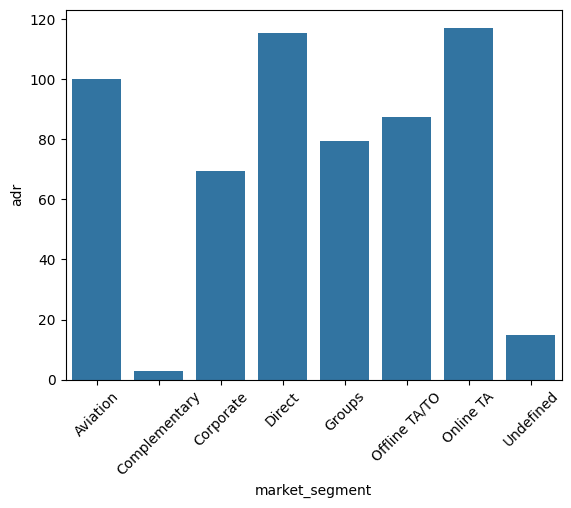

In [116]:

sns.barplot(x=segment_stats.index, y=segment_stats['adr']);  
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Direct'),
  Text(4, 0, 'Groups'),
  Text(5, 0, 'Offline TA/TO'),
  Text(6, 0, 'Online TA'),
  Text(7, 0, 'Undefined')])

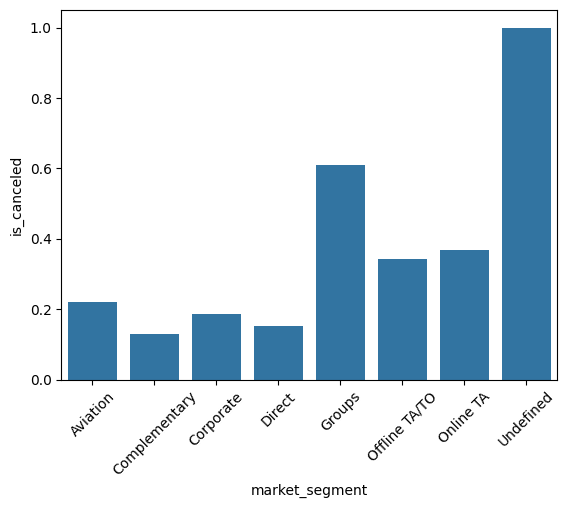

In [117]:
sns.barplot(x=segment_stats.index, y=segment_stats['is_canceled']);  
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Corporate'),
  Text(1, 0, 'Direct'),
  Text(2, 0, 'GDS'),
  Text(3, 0, 'TA/TO'),
  Text(4, 0, 'Undefined')])

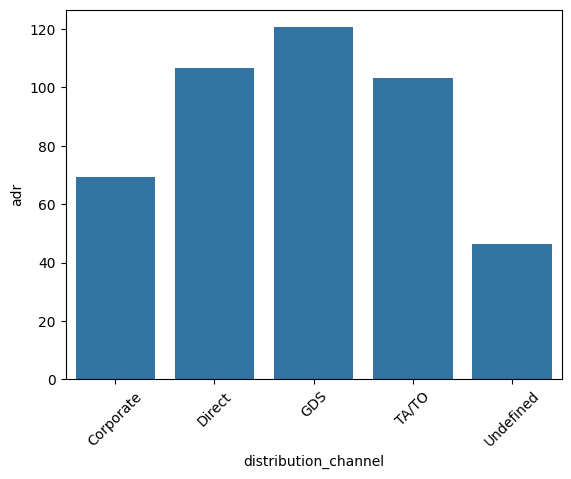

In [118]:
sns.barplot(x=channel_stats.index, y=channel_stats['adr']); 
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Corporate'),
  Text(1, 0, 'Direct'),
  Text(2, 0, 'GDS'),
  Text(3, 0, 'TA/TO'),
  Text(4, 0, 'Undefined')])

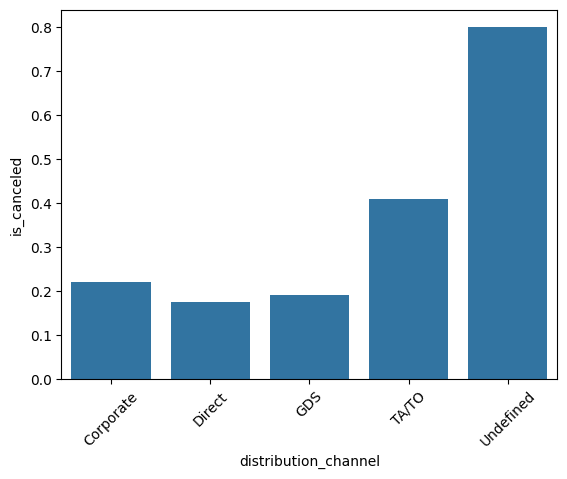

In [119]:
sns.barplot(x=channel_stats.index, y=channel_stats['is_canceled']);  
plt.xticks(rotation=45)

**Online TA gives highest ADR but higher risk of cancellations.**

**Direct bookings offer high ADR and low cancellation — most reliable.**

**Group bookings cancel often — need caution when forecasting.**

**GDS & Direct are high-value channels with acceptable cancellation rates.**

**TA/TO has high revenue but high volatility.**

14. What factors are most strongly associated with higher ADR?



In [128]:
correlation = df.corr(numeric_only=True)['adr'].sort_values(ascending=False)
print("Top correlations with ADR:\n", correlation.head(10))


Top correlations with ADR:
 adr                          1.000000
total_revenue                0.565766
total_guests                 0.368105
children                     0.324853
adults                       0.230641
arrival_date_year            0.197580
total_of_special_requests    0.172185
room_matched                 0.138133
arrival_date_month           0.079315
arrival_date_week_number     0.075791
Name: adr, dtype: float64


**As the magnitude of co-relation coefficient of total_revenue vs adr is close to 1, so we can consclude that total_revenue influences adr the most**

15. Are there customer types or segments consistently contributing to higher revenue?


In [129]:
revenue_by_customer = df.groupby('customer_type')['total_revenue'].mean().sort_values(ascending=False)
revenue_by_customer


customer_type
Contract           451.196700
Transient          381.631057
Transient-Party    260.493376
Group              243.813328
Name: total_revenue, dtype: float64

In [130]:
revenue_by_segment = df.groupby('market_segment')['total_revenue'].mean().sort_values(ascending=False)
revenue_by_segment

market_segment
Online TA        423.925625
Direct           404.016214
Aviation         368.971983
Offline TA/TO    336.591632
Groups           235.709290
Corporate        146.231399
Undefined         24.000000
Complementary      6.840538
Name: total_revenue, dtype: float64

**Contract and Transient customers contribute the highest per-booking revenue. Transient bookings offer both volume and value.**

**Online TA and Direct channels bring in the highest revenue. Complimentary bookings contribute nearly zero.**

In [135]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_date,reservation_status_date,total_guests,total_nights,total_revenue,is_upgraded,room_matched
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,2015/07/01,2.0,0,0.0,0,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,2015/07/01,2.0,0,0.0,0,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,Check-Out,2015-07-01,2015/07/02,1.0,1,75.0,1,0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,Check-Out,2015-07-01,2015/07/02,1.0,1,75.0,0,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,1,Check-Out,2015-07-01,2015/07/03,2.0,2,196.0,0,1


16. Do bookings with more lead time or from specific countries yield higher ADR?


In [144]:
df['lead_time_bucket'] = pd.cut(df['lead_time'], bins=[0, 30, 90, 180, 365, df['lead_time'].max()],
                                labels=['0–30d', '31–90d', '91–180d', '181–365d', '365+d'])

In [145]:
adr_by_lead_time = df.groupby('lead_time_bucket')['adr'].mean()
adr_by_lead_time

C:\Users\Adhyatm\AppData\Local\Temp\ipykernel_19276\3659239363.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adr_by_lead_time = df.groupby('lead_time_bucket')['adr'].mean()


lead_time_bucket
0–30d       101.922165
31–90d      106.572426
91–180d     109.125540
181–365d     95.073570
365+d        78.811569
Name: adr, dtype: float64

In [146]:
top_countries = df['country'].value_counts().head(5).index
adr_by_country = df[df['country'].isin(top_countries)].groupby('country')['adr'].mean()
adr_by_country

country
DEU    104.396756
ESP    116.995463
FRA    109.617276
GBR     96.022058
PRT     91.727724
Name: adr, dtype: float64

**Bookings made 1–6 months in advance have the highest ADR. Very early bookings (1+ year) tend to be cheaper — likely discounted group/contract rates.**

**International guests (ESP, FRA) tend to pay more than local (PRT). Portugal may get discounts due to domestic proximity.**

17. Are guests with higher ADR more likely to request special services or make booking modifications?


In [147]:
np.corrcoef(df.adr, df.total_of_special_requests)

array([[1.        , 0.17218526],
       [0.17218526, 1.        ]])

In [148]:
np.corrcoef(df.adr, df.booking_changes)

array([[1.        , 0.01961767],
       [0.01961767, 1.        ]])

**Guests who pay higher tend to make more special requests, but not more booking changes.**

18. Do guests from different countries behave differently in terms of booking timing or stay length?

In [149]:
country_behavior = df.groupby('country')[['lead_time', 'total_nights']].mean().sort_values(by='lead_time', ascending=False)
country_behavior.head(10)  


,lead_time,total_nights
country,,
FJI,322.000000,3.000000
FRO,286.400000,12.000000
BEN,274.000000,2.333333
LCA,268.000000,5.000000
KNA,251.500000,2.000000
MYT,208.000000,3.500000
MKD,198.200000,3.700000
BRB,192.000000,2.000000
DOM,185.285714,4.214286


In [150]:
country_behavior = df.groupby('country')[['lead_time', 'total_nights']].mean().sort_values(by='total_nights', ascending=False)
country_behavior.head(10)  


,lead_time,total_nights
country,,
FRO,286.400000,12.000000
SEN,55.727273,8.818182
AGO,23.096685,8.116022
TGO,62.000000,8.000000
GNB,40.888889,7.111111
PLW,169.000000,7.000000
BHS,159.000000,7.000000
SLE,84.000000,7.000000
RWA,102.000000,6.500000


**Countries like PRT (Portugal) might show shorter lead times, suggesting local or last-minute bookings.**

**Guests from countries farther away (like USA, BRA, GBR) may have longer lead times due to international travel planning.**

19. Are guests who make booking changes more likely to request additional services or cancel?

In [152]:
import scipy.stats as stats
contingency = pd.crosstab(df['booking_changes'] > 0, df['is_canceled'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
chi2, p


(4169.746849050339, 0.0)

**Ho: Guests who make booking changes are not more likely to cancel**

**As p 0 < 0.05, we reject H0 ⇒ Guests who make booking changes are more likely to request services or cancel.**

In [153]:
import scipy.stats as stats
contingency = pd.crosstab(df['booking_changes'] > 0, df['total_of_special_requests'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
chi2, p

(311.0949136567454, 4.120380110344912e-65)

**Ho: Guests who make booking changes are likely to request additional services**

**As p 0 < 0.05, we reject H0 ⇒ Guests who make booking changes are likely to request additional services.**